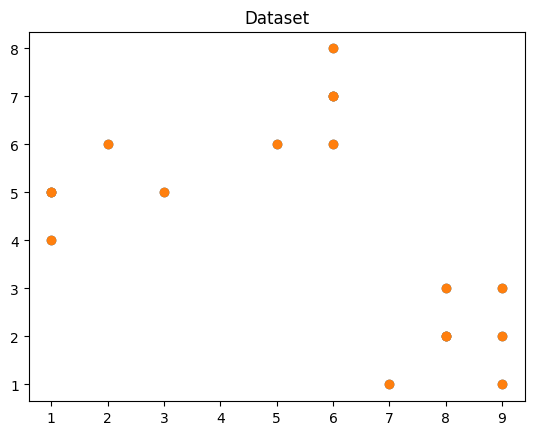

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# Creating the data
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

# Visualizing the data
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  1 , SSE =  3.4577032384495707


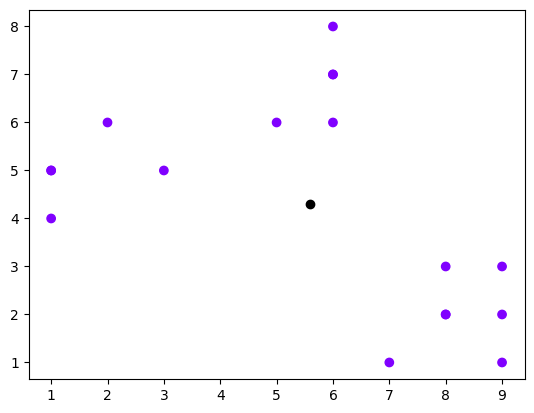

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  2 , SSE =  1.7687413573405673


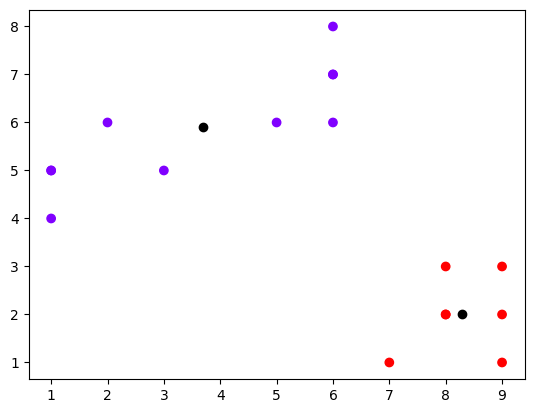

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  3 , SSE =  0.8819889697423957


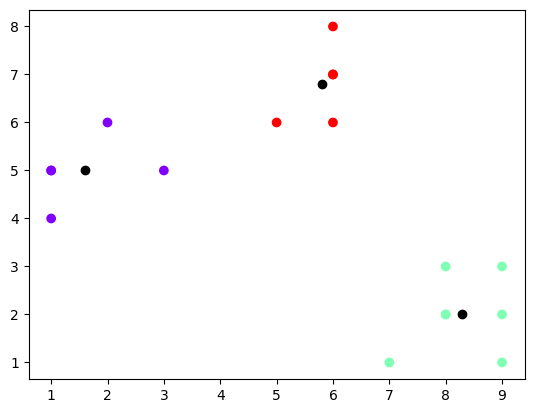

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  4 , SSE =  0.7587138847606585


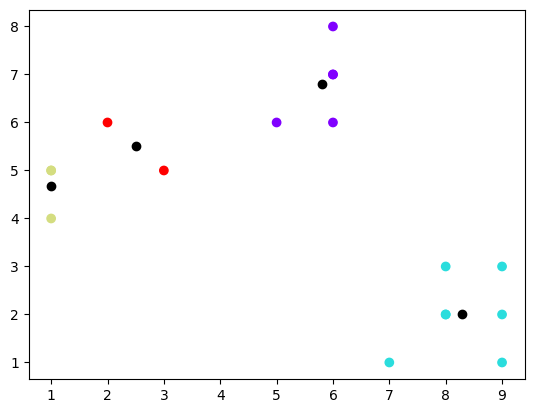

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  5 , SSE =  0.6833101158962954


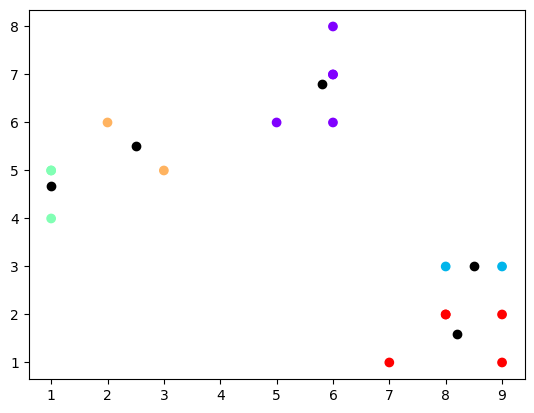

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  6 , SSE =  0.6178235133263348


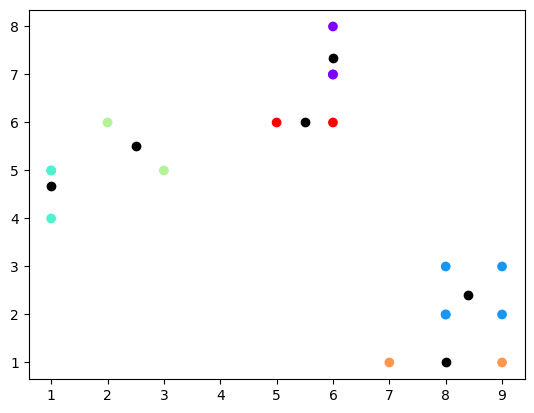

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  7 , SSE =  0.5093717077076824


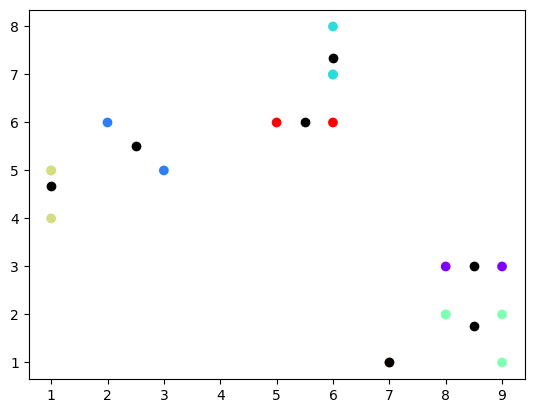

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  8 , SSE =  0.42618267462691206


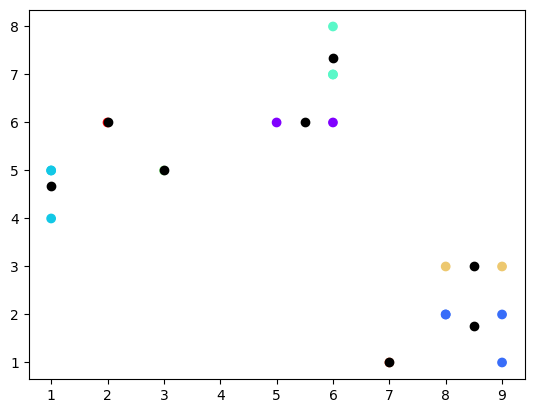

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Value of K =  9 , SSE =  0.3333333333333333


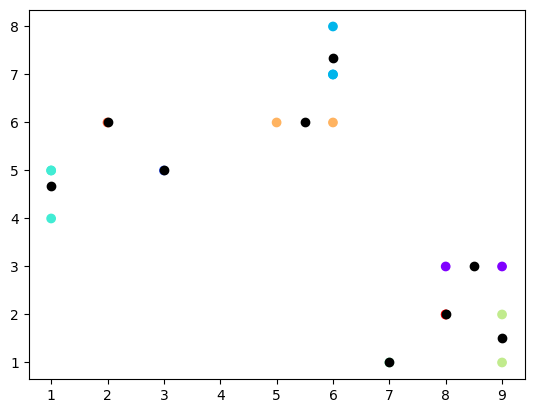

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.7587138847606585
5 : 0.6833101158962954
6 : 0.6178235133263348
7 : 0.5093717077076824
8 : 0.42618267462691206
9 : 0.3333333333333333


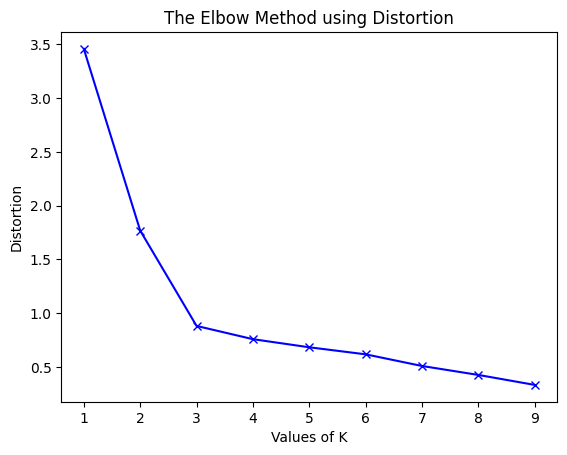

In [2]:
import matplotlib.pyplot as plt
distortions = []
mapping1 = {}


for k in range(1, 10):
	# Building and fitting the model
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)

  sse = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
  print("Value of K = ", k, ", SSE = ", sse)
  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
  mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
  plt.scatter(X[:,0],X[:,1], c=kmeanModel.labels_, cmap='rainbow')
  plt.scatter(kmeanModel.cluster_centers_[:,0] ,kmeanModel.cluster_centers_[:,1], color='black')
  plt.show()

for key, val in mapping1.items():
	print(f'{key} : {val}')
plt.plot(range(1, 10), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


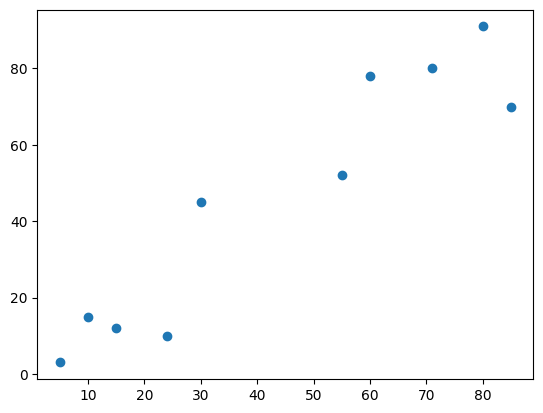

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[16.8 17. ]
 [70.2 74.2]]
[0 0 0 0 0 1 1 1 1 1]
[[16.8 17. ]
 [70.2 74.2]]
Quality of Clustering:  0.6586004781412067


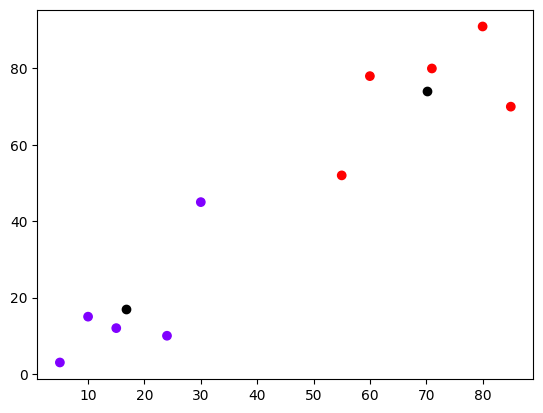

In [3]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,45],
    [85,70],
    [71,80],
    [60,78],
    [55,52],
    [80,91],])
plt.scatter(X[:,0],X[:,1], label='True Position')
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
cluster_labels = kmeans.predict(X)
C = kmeans.cluster_centers_
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(X))
print(C)
print("Quality of Clustering: ", sil)
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

     pelvic_incidence  pelvic_radius  thoracic_slope  Cluster
0           63.027817      98.672917         14.5386        2
1           39.056951     114.405425         17.5323        0
2           68.832021     105.985135         17.4861        2
3           69.297008     101.868495         12.7074        2
4           49.712859     108.168725         15.9546        2
..                ...            ...             ...      ...
305         47.903565     117.449062         14.7484        0
306         53.936748     114.365845         18.1972        0
307         61.446597     125.670725         13.5565        0
308         45.252792     118.545842         16.0928        0
309         33.841641     123.945244         17.6963        0

[310 rows x 4 columns]
[[ 46.42903837 124.47018491  13.26250567]
 [ 80.49567418 120.00557969  12.78133516]
 [ 62.59438009 103.64870812  13.03697051]]
Quality of Clustering:  0.3539586349354204


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-c3f512d00a9b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster_labels


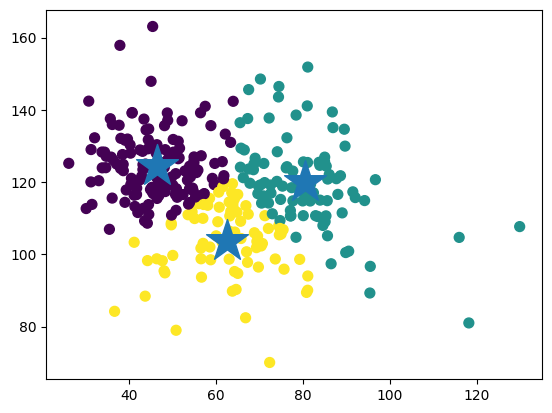

<Figure size 640x480 with 0 Axes>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data = pd.read_csv("spinem.csv")
X = data[['pelvic_incidence', 'pelvic_radius', 'thoracic_slope']]
kmeans = KMeans(n_clusters = 3, random_state = 123)
model = kmeans.fit(X)
cluster_labels = kmeans.predict(X)
X['Cluster'] = cluster_labels
print(X)
C = kmeans.cluster_centers_
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(data))
print(C)
print("Quality of Clustering: ", sil)
#For 2-D plot of the data points along with the centroids …
fig = plt.figure()
plt.scatter(X['pelvic_incidence'], X['pelvic_radius'], c=cluster_labels,
            s=50, cmap='viridis');
plt.scatter(C[:, 0], C[:, 1], marker='*', s=1000)

#For 3-D plot of the data points along with the centroids …
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['pelvic_incidence'], X['pelvic_radius'],
           X['thoracic_slope'],
           c=cluster_labels,
          cmap='viridis');
ax.scatter(C[:, 0], C[:, 1],  C[:, 2],
           marker='*',
           c='#050505')

**The following code block implements k-means algorithm from the scratch**

[array([63.0278175 , 98.67291675, 14.5386    ,  2.        ]), array([ 39.05695098, 114.4054254 ,  17.5323    ,   0.        ]), array([ 68.83202098, 105.9851355 ,  17.4861    ,   2.        ])]
[[ 62.59438009 103.64870812  13.03697051   2.        ]
 [ 46.42903837 124.47018491  13.26250567   0.        ]
 [ 80.49567418 120.00557969  12.78133516   1.        ]]
Quality of Clustering:  0.3539586349354204


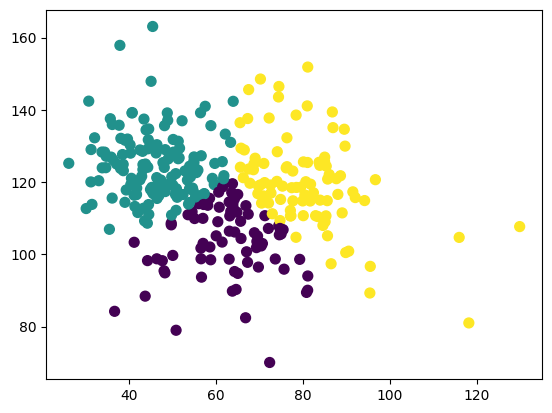

In [5]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters_kmeans(X, n_clusters, rseed=2):

    # 1. Randomly choose clusters
    #rng = np.random.RandomState(rseed)
    #i = rng.permutation(X.shape[0])[:n_clusters]
    #centers = X[i]

    centers = [X[0], X[1], X[2]]
    print(centers)

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels
X = np.array(X)
centers, cluster_labels = find_clusters_kmeans(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels,
            s=50, cmap='viridis');
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(data))
print(centers)
print("Quality of Clustering: ", sil)